____________
# Traffic Collision Data
## From the City of Seattle 
------------
# <b>MACHINE LEARNING PREDICTIVE MODELS</b>
------------

In [624]:
# Pandas Library & csv reading dataset
import pandas as pd

filename = 'Data-Collisions_Cleanv2.csv'
df = pd.read_csv(filename,low_memory=False)
print('Dataset Imported!\n',df.columns)

# Removal of Non-Used Values for the Classifiers
df = df[(df.WEATHER != 'Unknown') & (df.WEATHER != 'Other')]
df = df[(df.ROADCOND != 'Unknown') & (df.ROADCOND != 'Other')]
df = df[(df.LIGHTCOND != 'Unknown') & (df.LIGHTCOND != 'Other')]
df.reset_index(drop=True, inplace=True)

df['SEVERITYCODE1'] = df['SEVERITYCODE']
df['SEVERITYCODE1'].replace(to_replace=[1, 2],
                        value=[0,1],inplace=True)

df['WEATHER_V'] = df['WEATHER']
df['WEATHER_V'].replace(to_replace=['Clear', 'Fog/Smog/Smoke', 'Overcast', 'Raining', 'Snowing'],
                        value=[0,1,2,3,4],inplace=True)
df['WEATHER_V'] = pd.to_numeric(df['WEATHER_V'], downcast='float')

df['ROADCOND_V'] = df['ROADCOND']
df['ROADCOND_V'].replace(to_replace=['Dry', 'Ice', 'Snow/Slush', 'Wet'],
                         value=[0,1,2,3],inplace=True)
df['ROADCOND_V'] = pd.to_numeric(df['ROADCOND_V'], downcast='float')

df['LIGHTCOND_V'] = df['LIGHTCOND']
df['LIGHTCOND_V'].replace(to_replace=['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'], 
                          value=[0,1,2,3,4,5],inplace=True)
df['LIGHTCOND_V'] = pd.to_numeric(df['LIGHTCOND_V'], downcast='float')
df_copy = df.copy()

print('-------------------------------')
print(df['SEVERITYCODE1'].value_counts())
print(df['SEVERITYDESC'].value_counts())
print('-------------------------------\n')

print('-------------------------------')
print(df['WEATHER_V'].value_counts())
print(df['WEATHER'].value_counts())
print('-------------------------------\n')

print('-------------------------------')
print(df['ROADCOND_V'].value_counts())
print(df['ROADCOND'].value_counts())
print('-------------------------------\n')

print('-------------------------------')
print(df['LIGHTCOND_V'].value_counts())
print(df['LIGHTCOND'].value_counts())
print('-------------------------------\n')
df.dtypes

Dataset Imported!
 Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'COLLISIONVEH', 'DATE', 'DATE_YR', 'DATE_MO', 'TIME',
       'TIMESTR', 'TIME_HR', 'WEATHER_V', 'ROADCOND_V', 'LIGHTCOND_V',
       'COLLISIONVEH_V'],
      dtype='object')
-------------------------------
0    113985
1     55554
Name: SEVERITYCODE1, dtype: int64
Property Damage Only Collision    113985
Injury Collision                   55554
Name: SEVERITYDESC, dtype: int64
-------------------------------

-------------------------------
0.0    108763
3.0     32512
2.0     26890
4.0       823
1.0       551
Name: WEATHER_V, dtype: int64
Clear             108763
Raining            32512
Overcast           26890
Snowing              823
Fog/Smog/Smoke      

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
LOCATION           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
COLLISIONVEH       object
DATE               object
DATE_YR             int64
DATE_MO             int64
TIME               object
TIMESTR            object
TIME_HR            object
WEATHER_V         float32
ROADCOND_V        float32
LIGHTCOND_V       float32
COLLISIONVEH_V      int64
SEVERITYCODE1       int64
dtype: object

In [625]:
import itertools
import numpy as np
import pylab as pl
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

%matplotlib inline

## DATA PREPARATION, X_train, X_test, y_train, y_test

In [662]:
X = df[['WEATHER_V', 'ROADCOND_V','LIGHTCOND_V']].values
#X = df[['WEATHER_V', 'ROADCOND_V']].values
#X = df[['WEATHER_V']].values
y = df['SEVERITYCODE1'].values

print('-------------------------------')
print('X:\n',X[0:5])
print('y:\n',y[0:5])

X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print('-------------------------------\n')
print('X Scaled:\n',X[0:5])
print('-------------------------------\n')
print ('Train set Dimensions:', X_train.shape,  y_train.shape)
print ('Test set: Dimensions', X_test.shape,  y_test.shape)
print('-------------------------------\n')

-------------------------------
X:
 [[2. 3. 4.]
 [3. 3. 2.]
 [2. 0. 4.]
 [0. 0. 4.]
 [3. 3. 4.]]
y:
 [1 0 0 0 1]
-------------------------------

X Scaled:
 [[ 0.8566364   1.6214671   0.5838857 ]
 [ 1.6462952   1.6214671  -1.4188942 ]
 [ 0.8566364  -0.62430453  0.5838857 ]
 [-0.72268146 -0.62430453  0.5838857 ]
 [ 1.6462952   1.6214671   0.5838857 ]]
-------------------------------

Train set Dimensions: (135631, 3) (135631,)
Test set: Dimensions (33908, 3) (33908,)
-------------------------------



-------------
# KNN CLASSIFIER
-------------

In [640]:
from sklearn.neighbors import KNeighborsClassifier

#K-Neighbors Testing
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print('-------------------------------\n')
print('Accuracy:\n',mean_acc)
print('-------------------------------\n')

-------------------------------

Accuracy:
 [0.66863277 0.67208328 0.43730093 0.65031851 0.42916126 0.64217884
 0.64211985 0.65031851 0.65025953 0.65031851 0.65025953 0.67270261
 0.67264362 0.67270261]
-------------------------------



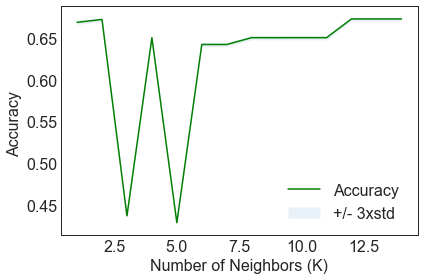

-------------------------
The best accuracy was with 0.6727026070543825 with k= 12


In [641]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "-------------------------\nThe best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [644]:
# Using the best K
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)

print("KNN Model:\n", neigh)
#print("yhat_KNN (Predicted Values):", yhat_KNN[0:5])
print("Train set Accuracy:  %.2f" % metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:  %.2f" % metrics.accuracy_score(y_test, yhat_KNN))
print (classification_report(y_test, yhat_KNN))

KNN Model:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Train set Accuracy:  0.64
Test set Accuracy:  0.64
              precision    recall  f1-score   support

           0       0.67      0.91      0.77     22810
           1       0.32      0.08      0.13     11098

    accuracy                           0.64     33908
   macro avg       0.50      0.50      0.45     33908
weighted avg       0.56      0.64      0.56     33908



---------
# DECISION TREE CLASSIFIER
---------

In [664]:
from sklearn.tree import DecisionTreeClassifier

sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
sevTree # it shows the default parameters
sevTree.fit(X_train,y_train)
predTree = sevTree.predict(X_test)

print('-------------------------------\n')
print ('Decision Tree Model:\n', sevTree)
print('-------------------------------\n')
print("DecisionTrees's Accuracy: %.2f" % metrics.accuracy_score(y_test, predTree))
print('-------------------------------\n')
print (classification_report(y_test, predTree))

-------------------------------

Decision Tree Model:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
-------------------------------

DecisionTrees's Accuracy: 0.67
-------------------------------

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     22810
           1       0.00      0.00      0.00     11098

    accuracy                           0.67     33908
   macro avg       0.34      0.50      0.40     33908
weighted avg       0.45      0.67      0.54     33908



In [ ]:
# Categorical Variables Labeled into Values (Done above, Manually)
#le_weather = preprocessing.LabelEncoder()
#le_weather.fit([1,2,3,4,5,6,7])
#X[:,0] = le_weather.transform(X[:,0]) 

#le_roadcond = preprocessing.LabelEncoder()
#le_roadcond.fit([1,2,3,4,5,6])
#X[:,1] = le_roadcond.transform(X[:,1])

#le_lightcond = preprocessing.LabelEncoder()
#le_lightcond.fit([1,2,3,4,5,6,7,8])
#X[:,2] = le_lightcond.transform(X[:,2]) 

#X[0:5]


In [ ]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

my_data = df[['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
dot_data = StringIO()
filename = r'img/severity_tree.png'
featureNames = my_data.columns[1:4]
targetNames = my_data["SEVERITYDESC"].unique().tolist()
out = tree.export_graphviz(sevTree,feature_names=featureNames, 
        out_file=dot_data, class_names= np.unique(y_train), 
        filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 800))
plt.imshow(img,interpolation='nearest')

![title](img/severity_tree.png)

-----------
# LOGISTIC REGRESSION
------------

In [666]:
from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat1_LR = LR1.predict(X_test)
yhat_prob1 = LR1.predict_proba(X_test)

# Different Solver and Regularization
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat2_LR = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)

print('-------------------------------')
print ('Logistic Regression:\n', LR1)
print('-------------------------------')
#print ('y_hat (LR Predict):\n', yhat1_LR[0:5], ' - ', yhat2_LR[0:5])
#print('-------------------------------')
#print("Prediction Probability (LR1):\n ", yhat_prob1, '\n-------------------------------\n & LR2\n ', yhat_prob2) 
#print('-------------------------------')

#print('-------------------------------')
print("LR1 Accuracy: %.2f" % metrics.accuracy_score(y_test, yhat1_LR))
#print("LR2 Accuracy: %.2f" % metrics.accuracy_score(y_test, yhat2_LR))
print('-------------------------------')

#print('-------------------------------')
print ("LR1 LogLoss: %.2f" % log_loss(y_test, yhat_prob1))
#print ("LR2 LogLoss: %.2f" % log_loss(y_test, yhat_prob2))
print('-------------------------------')


-------------------------------
Logistic Regression:
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
-------------------------------
LR1 Accuracy: 0.67
-------------------------------
LR1 LogLoss: 0.63
-------------------------------


# SVM, Support Vector Machine


In [660]:
from sklearn import svm

sev1 = svm.SVC(kernel='rbf')
sev1.fit(X_train, y_train) 
yhat1_SVM = sev1.predict(X_test)

#MODEL WITH A LINEAR KERNEL
sev2 = svm.SVC(kernel='linear')
sev2.fit(X_train, y_train) 
yhat2_SVM = sev2.predict(X_test)

print('-------------------------------\n')
print ('Support Vector Machine Model:\n', sev1)
print('-------------------------------\n')
#print ('y_hat (SVM1 & SVM2 Predict):\n', yhat1_SVM[0:5], ' - ', yhat2_SVM[0:5])
#print('-------------------------------\n')

#print('-------------------------------')
print("SVM1 Accuracy: %.2f" % metrics.accuracy_score(y_test, yhat1_SVM))
#print("SVM2 Accuracy: %.2f" % metrics.accuracy_score(y_test, yhat2_SVM))
print('-------------------------------')



-------------------------------

Support Vector Machine Model:
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
-------------------------------

SVM1 Accuracy: 0.67
-------------------------------


------------
# MODELS EVALUATION
-------------

In [667]:
print('-------------------------------')
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_KNN))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat_KNN, average='weighted') )
print('-------------------------------')

print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree))
print("DT F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )
print('-------------------------------')

print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat1_LR))
print("LR F1-score: %.2f" % f1_score(y_test, yhat1_LR, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob1))
print('-------------------------------')

print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat1_SVM))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat1_SVM, average='weighted') )
print('-------------------------------')


print (classification_report(y_test, yhat_KNN))
print (classification_report(y_test, predTree))
print (classification_report(y_test, yhat1_LR))
print (classification_report(y_test, yhat1_SVM))


-------------------------------
KNN Jaccard index: 0.64
KNN F1-score: 0.56
-------------------------------
DT Jaccard index: 0.67
DT F1-score: 0.54
-------------------------------
LR Jaccard index: 0.67
LR F1-score: 0.54
LR LogLoss: 0.63
-------------------------------
SVM Jaccard index: 0.33
SVM F1-score: 0.16
-------------------------------
              precision    recall  f1-score   support

           0       0.67      0.91      0.77     22810
           1       0.32      0.08      0.13     11098

    accuracy                           0.64     33908
   macro avg       0.50      0.50      0.45     33908
weighted avg       0.56      0.64      0.56     33908

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     22810
           1       0.00      0.00      0.00     11098

    accuracy                           0.67     33908
   macro avg       0.34      0.50      0.40     33908
weighted avg       0.45      0.67      0.54     33908

 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.64    | 0.56     | NA      |
| Decision Tree      | 0.67    | 0.54     | NA      |
| LogisticRegression | 0.67    | 0.54     | 0.63    |
| SVM                | 0.33    | 0.16     | NA      |